# Curve fitting

In this notebook we'll look at fitting curves to biological data

requirements:
```pandas```
```numpy```
```scipy```


Curve types:
* Enzyme kinetics - mm
* Growth curves - sigmoid


In [1]:
import os
import pandas as pd

kinetics_data = [i for i in os.listdir('tutorial-data/curve-fitting') if 'Enzyme' in i]

first_file_path = os.path.join('tutorial-data/curve-fitting', kinetics_data[0])
print(f'First file: \t {first_file_path}')


data = pd.read_csv(first_file_path, index_col =0)
data

First file: 	 tutorial-data/curve-fitting/Enzyme-vmax=1.53-km=17.41.csv


,[Substrate]/µM,Reaction Rate
0,0.000000,-0.071544
1,7.142857,0.466195
2,14.285714,0.594671
3,21.428571,0.852463
4,28.571429,0.931972
5,35.714286,1.030320
6,42.857143,1.145793
7,50.000000,1.206577
8,57.142857,1.144247
9,64.285714,1.318903


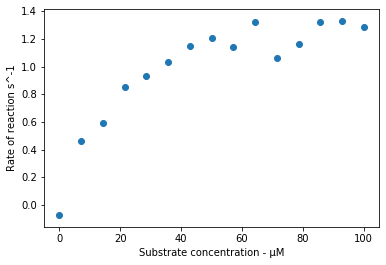

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data['[Substrate]/µM'], data['Reaction Rate'])
plt.ylabel('Rate of reaction s^-1')
plt.xlabel('Substrate concentration - µM')
plt.show()

In [3]:
def michaelis_menten(x,km,vmax):
    return (vmax*x)/(km + x)

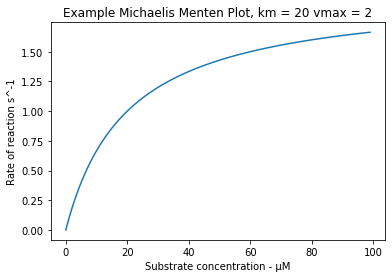

In [4]:
x = list(range(0, 100))

example_km = 20
example_vmax = 2

y = [michaelis_menten(i, example_km, example_vmax) for i in x]

plt.plot(x,y)
plt.title(f'Example Michaelis Menten Plot, km = {example_km} vmax = {example_vmax}')
plt.ylabel('Rate of reaction s^-1')
plt.xlabel('Substrate concentration - µM')
plt.show()

In [9]:
from scipy.optimize import curve_fit

params, covariance = curve_fit(michaelis_menten, data['[Substrate]/µM'], data['Reaction Rate'])

print(f'Km = {params[0]} \t Vmax = {params[1]}')
print()
print(first_file_path)

Km = 18.05020229193532 	 Vmax = 1.5406975060247075

tutorial-data/curve-fitting/Enzyme-vmax=1.53-km=17.41.csv


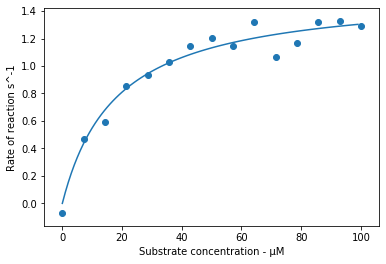

In [6]:
predicted_km = params[0]
predicted_vmax = params[1]

x = list(range(0, 100))
y = [michaelis_menten(i, predicted_km, predicted_vmax) for i in x]

plt.plot(x,y)
plt.scatter(data['[Substrate]/µM'], data['Reaction Rate'])
plt.ylabel('Rate of reaction s^-1')
plt.xlabel('Substrate concentration - µM')
plt.show()

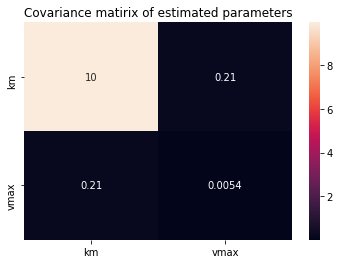

In [7]:
import seaborn as sns

sns.heatmap(covariance, annot=True, xticklabels = ['km','vmax'], yticklabels = ['km','vmax'])
plt.title('Covariance matirix of estimated parameters')
plt.show()